In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# !/usr/bin/env pip install /app/torch_bspline/.

/tmp/ipykernel_2302125/3613016792.py:49: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


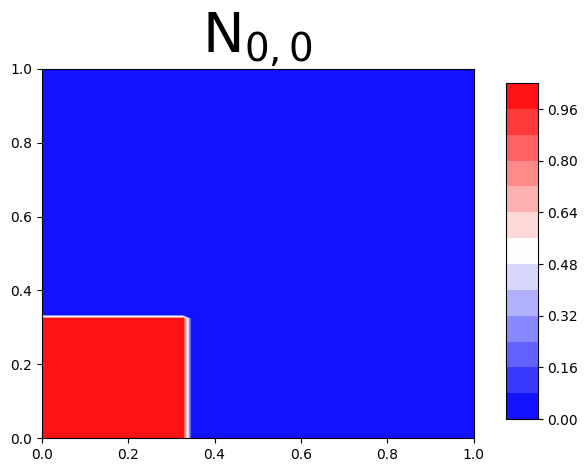

In [7]:
# 3rd Party
import torch
import numpy as np
import matplotlib.pyplot as plt

# Local
from torch_bspline.src.torch_bspline.tensor_grid import TensorGrid
from torch_bspline.src.torch_bspline.bspline import BSpline
from torch_bspline.src.torch_bspline.tensor_basis import TensorBasis
from torch_bspline.src.torch_bspline.functions import BSplineFunctions

params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)

def visualize_basis(*,
    cmap:str='bwr',
    dtype:torch.dtype=torch.float64,
    fontsize:int=40,
    num_x_bases:int=3,
    num_y_bases:int=3,
    num_contour_levels:int=15,
    poly_order:int=0,
    title='Func Value',
) -> None:

    x_basis = BSpline.uniform(
        lims=(0,1),
        n_segments=num_x_bases - poly_order,
        degree=poly_order,
        dtype=dtype
    )
    y_basis = BSpline.uniform(
        lims=(0,1),
        n_segments=num_y_bases - poly_order,
        degree=poly_order,
        dtype=dtype
    )

    xy_basis = TensorBasis(x_basis, y_basis)

    xy_grid = TensorGrid(
        xs = torch.linspace(0,1,50, dtype=dtype),
        ys = torch.linspace(0,1,100, dtype=dtype),
        x_varies_first=True
    )
    X, Y  = np.meshgrid(xy_grid.xs.numpy(), xy_grid.ys.numpy())

    fig = plt.figure()
    fig.show()
    for i in range(num_x_bases):
        for j in range(num_y_bases):

            title = f'$N_\u007b {i}, {j} \u007d$'

            weights = torch.zeros((num_x_bases*num_y_bases,1), dtype=dtype)
            weights[i*num_y_bases + j] = 1.

            f = BSplineFunctions(xy_basis, weights)
            Z = f(xy_grid).reshape(X.shape)
            ax = fig.add_subplot(111)

            cs = ax.contourf(X, Y, Z, levels=num_contour_levels, cmap=cmap)

            ax.set_title(title, fontsize=fontsize)
            fig.subplots_adjust(right=0.8)
            cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
            fig.colorbar(cs, cax=cbar_ax)
            fig.canvas.draw()
            plt.pause(1.)
            fig.clf()

    return

if __name__ == '__main__':
    visualize_basis()

/tmp/ipykernel_2302125/3807103509.py:55: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


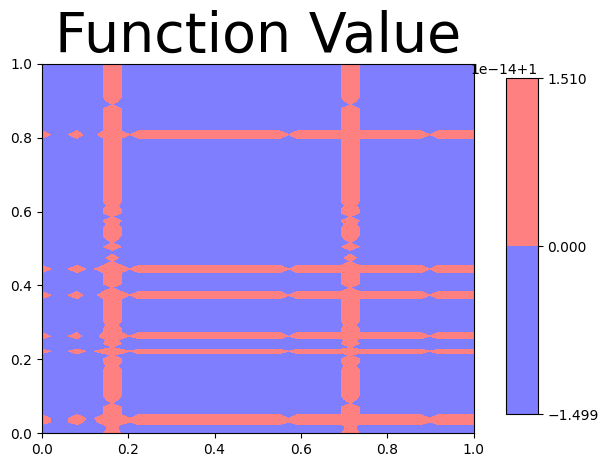

Laplacian should be everywhere zero...
Laplacian(f).max() = 1.4210854715202004e-14
Laplacian(f).min() = -1.3706207885826932e-14


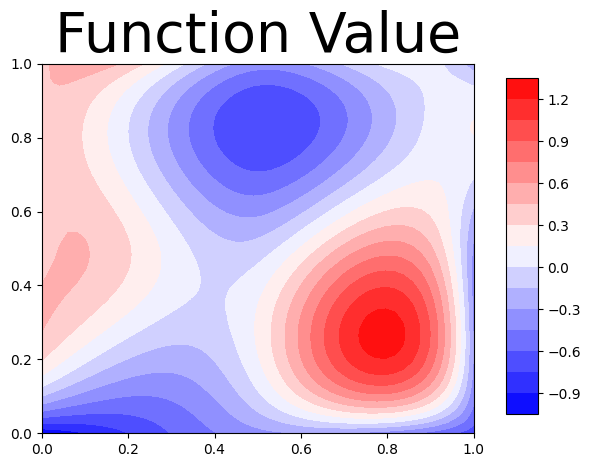

Laplacian should NOT be everywhere zero...
Laplacian(f).max() = 63.566408160731314
Laplacian(f).min() = -117.15651534440339
Laplacian should NOT be everywhere zero...
Laplacian(f).max() = 43.93940025558727
Laplacian(f).min() = -114.25384784248095


In [8]:

# Standard
from typing import Tuple
# 3rd Party
import torch
import numpy as np
import matplotlib.pyplot as plt

# Local
from torch_bspline.src.torch_bspline.tensor_grid import TensorGrid
from torch_bspline.src.torch_bspline.bspline import BSpline
from torch_bspline.src.torch_bspline.tensor_basis import TensorBasis
from torch_bspline.src.torch_bspline.functions import BSplineFunctions

params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)

def visualize_function(*,
    num_x_bases:int,
    num_y_bases:int,
    weights:torch.Tensor,
    cmap:str='bwr',
    dtype:torch.dtype=torch.float64,
    fontsize:int=40,
    num_contour_levels:int=15,
    poly_order:int=3,
    title='Func Value'
) -> Tuple[BSplineFunctions, TensorGrid]:

    assert weights.shape == (num_x_bases*num_y_bases,)

    x_basis = BSpline.uniform(
        lims=(0,1),
        n_segments=num_x_bases - poly_order,
        degree=poly_order,
        dtype=dtype
    )

    y_basis = BSpline.uniform(
        lims=(0,1),
        n_segments=num_y_bases - poly_order,
        degree=poly_order,
        dtype=dtype
    )

    xy_basis = TensorBasis(x_basis, y_basis)

    xy_grid = TensorGrid(
        xs = torch.linspace(0,1,50, dtype=dtype),
        ys = torch.linspace(0,1,100, dtype=dtype),
        x_varies_first=True
    )
    X, Y  = np.meshgrid(xy_grid.xs.numpy(), xy_grid.ys.numpy())

    fig = plt.figure()
    fig.show()

    title = f'Function Value'

    f = BSplineFunctions(xy_basis, weights)
    Z = f(xy_grid).reshape(X.shape)
    ax = fig.add_subplot(111)

    cs = ax.contourf(X, Y, Z, levels=num_contour_levels, cmap=cmap)

    ax.set_title(title, fontsize=fontsize)
    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
    fig.colorbar(cs, cax=cbar_ax)
    fig.canvas.draw()
    plt.show()

    return f, xy_grid

if __name__ == '__main__':

    f, xy_grid = visualize_function(
        weights=torch.ones((25,), dtype=torch.float64),
        num_x_bases=5,
        num_y_bases=5
    )

    print("Laplacian should be everywhere zero...")
    print(f"Laplacian(f).max() = {f.laplacian(xy_grid).max()}")
    print(f"Laplacian(f).min() = {f.laplacian(xy_grid).min()}")

    f, xy_grid = visualize_function(
        weights=torch.randn((25,), dtype=torch.float64),
        num_x_bases=5,
        num_y_bases=5
    )

    print("Laplacian should NOT be everywhere zero...")
    print(f"Laplacian(f).max() = {f.laplacian(xy_grid).max()}")
    print(f"Laplacian(f).min() = {f.laplacian(xy_grid).min()}")

    xy = torch.rand((100,2), dtype=torch.float64)

    print("Laplacian should NOT be everywhere zero...")
    print(f"Laplacian(f).max() = {f.laplacian(xy).max()}")
    print(f"Laplacian(f).min() = {f.laplacian(xy).min()}")
